# Assignment 4

The assignment 4 contains 2 questions and the due date is May 17th (Sunday) 23:59PM.

## Question 1 Image Classification (40 points)

In this question, you are simply asked to follow the tutorials on the Tensorflow to familiarize with the Tensorflow and Neural networks. 

Finish two tutorials by replicating the steps:

1) Image classification (20 points) (https://www.tensorflow.org/tutorials/images/classification)

2) Transfer learning with pretrained model (20 points) (https://www.tensorflow.org/tutorials/images/transfer_learning)

 After you finish all steps, prepare two images, one dog image and one cat image and see whether your model would predict correctly. 


## Tutorial 1

In [1]:
# Import the packages
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
# Url from where the dataset was
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Download and extract the dataset
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# File path for the downloaded dataset
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
# Assigning variables to the file path for the training and validation sets
train_folder = os.path.join(PATH, 'train')
validation_folder = os.path.join(PATH, 'validation')

In [4]:
# Assigning variables to the training and validation sets split by cats and dogs
train_cats_folder = os.path.join(train_folder, 'cats')  # Training - cats
train_dogs_folder = os.path.join(train_folder, 'dogs')  # Training - dogs
validation_cats_folder = os.path.join(validation_folder, 'cats')  # Validation - cats
validation_dogs_folder = os.path.join(validation_folder, 'dogs')  # Validation - dogs

In [5]:
# Understanding the data - amount of images of cats and dogs in the validation and training directories
num_cats_tr = len(os.listdir(train_cats_folder))
num_dogs_tr = len(os.listdir(train_dogs_folder))

num_cats_val = len(os.listdir(validation_cats_folder))
num_dogs_val = len(os.listdir(validation_dogs_folder))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


print(f'Total training cat images: {num_cats_tr}')
print(f'Total training dog images: {num_dogs_tr}\n')

print(f'Total validation cat images: {num_cats_val}')
print(f'Total validation dog images: {num_dogs_val}\n')

print(f'Total training images: {total_train}')
print(f'Total validation images: {total_val}')

Total training cat images: 1000
Total training dog images: 1000

Total validation cat images: 500
Total validation dog images: 500

Total training images: 2000
Total validation images: 1000


In [6]:
# Variables to use for the pre-processing the dataset and training the network
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Data preparation

Before feeding the network, the images should be formatted "into appropriately pre-processed floating point tensors". Thus, it is necessary to follow the steps mentioned below:

1. Read images from the disk;
2. Decode contents of these images and convert it into proper grid format as per their RGB content;
3. Convert them into floating point tensors;
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1 (neural networks prefer to deal with small input values).

ImageDataGenerator class from tf.keras can do all this. "It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network."

In [7]:
# First, we must create the generators so that all its class methods can be used
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for validation data

In [8]:
# The flow_from_directory method loads the images from the disk, applies rescaling, and resizes the images into
# the required dimensions.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_folder,
                                                           shuffle=True, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

# If shuffle = False, sorts the data in alphanumeric order. It is set to True by default
# class_mode determines the type of label arrays returned. Setting it to binary, returns 1D binary labels

Found 2000 images belonging to 2 classes.


In [9]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_folder,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


#### Visualize training images
Visualize the training images by extracting a batch of images from the training generator (32 in this example) and then plot 5 with matplotlib.

In [10]:
# The next function returns a batch from the dataset. Its return value is in form of (x_train, y_train) where 
# x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.
sample_training_images, _ = next(train_data_gen)

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each
# column.
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

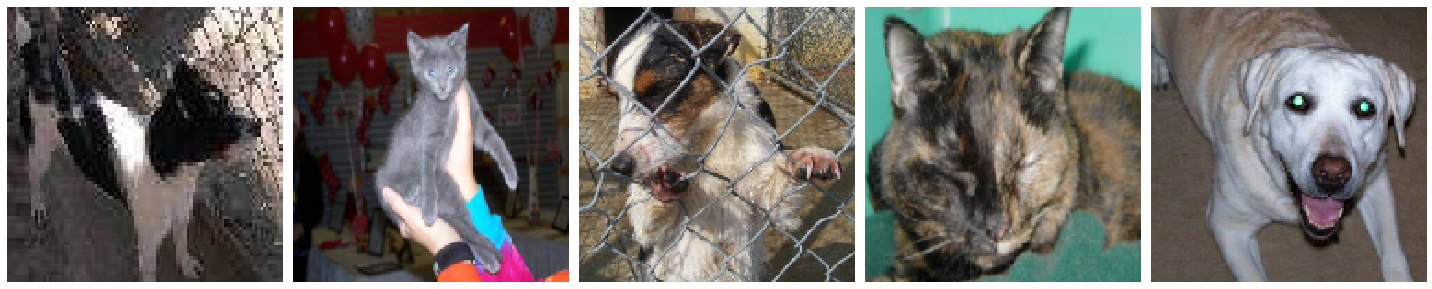

In [12]:
plot_images(sample_training_images[:5])

### Create the model
The model has 3 convolution blocks with a max pool layer in each of them. There is a fully connected layer with 512 units on top of it, activated by a relu activation function.

In [13]:
model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),Dense(1)])

#### Compile the model
In the tutorial, it was chosen the ADAM optimizer and the binary cross entropy loss function. In order to view  the training and validation accuracy for each training epoch, it must be passed the metrics argument.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Model Summary
The summary method of the model allows for the visualizations of all the network layers

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

#### Training the model
The fit_generator method of the ImageDataGenerator should be used to train the network.

In [16]:
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=total_train // batch_size,
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=total_val // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 56s 4s/step - loss: 1.0401 - accuracy: 0.4989 - val_loss: 0.6912 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - 61s 4s/step - loss: 0.6904 - accuracy: 0.4973 - val_loss: 0.6845 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 61s 4s/step - loss: 0.6697 - accuracy: 0.5234 - val_loss: 0.6911 - val_accuracy: 0.5234
Epoch 4/15
15/15 [==============================] - 62s 4s/step - loss: 0.6622 - accuracy: 0.5871 - val_loss: 0.6706 - val_accuracy: 0.5078
Epoch 5/15
15/15 [==============================] - 63s 4s/step - loss: 0.6232 - accuracy: 0.6047 - val_loss: 0.6206 - val_accuracy: 0.6239
Epoch 6/15
15/15 [==============================] - 65s 4s/step - loss: 0.5571 - accuracy: 0.6843 - val_loss: 0.5800 - val_accuracy: 

#### Visualizing training results

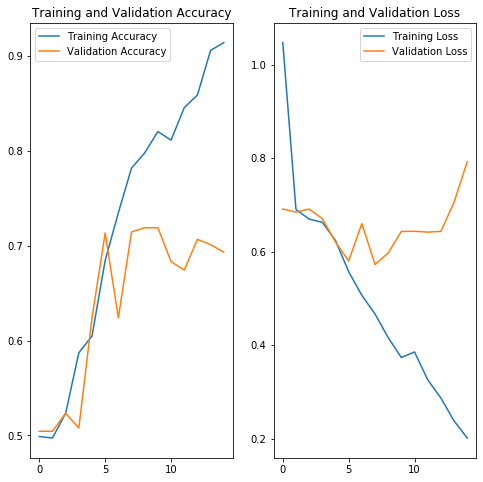

In [17]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Looking at the plots above, it is possible to see that from a certain point onwards, the training accuracy kept increasing, while the validation one remained sort of stable. In what concerns the loss, the training one consistently decreased, while the validation one remained stable for a period and started increasing again, to levels worse than those at the beginning.

### Overfitting
Considering the plots and their analysis, it is an indicator that the model is overfitting. As there are not many training examples, the model can learn aspects which are not relevant (noise or unwanted details) and that impacts the model's performance when new examples are presented. This means that the model will not be very able to generalize corrrectly what it learned in a new dataset

To fight overfitting in the training process, although there are several ways, data augmentation and dropout will be the two considered.

### Data augmentation
As overfitting usually occurs when the number of training examples is small, increasing the dataset for it have an enough number of examples is a way to fix it. Data augmentation generates "more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images." The goal is for the model not to see the exact same example more than once during the training phase. Thus, the model will be exposed to more aspects of the data, increasing the ability of generalization

```ImageDataGenerator``` is able to apply different transformations to the dataset and it will also apply it during training.

#### Horizontal flip
Passing ```horizontal_flip``` as an argument to the ```ImageDataGenerator``` and setting it to ```True``` will apply this augmentation.

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_folder,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


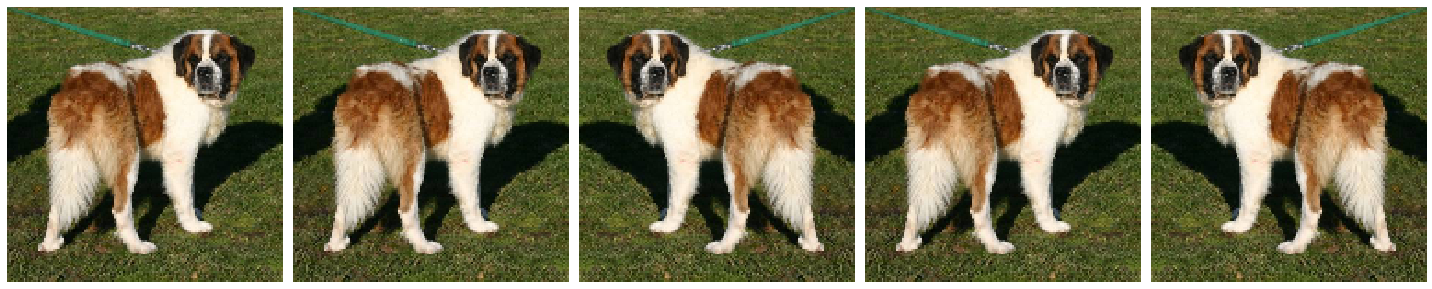

In [19]:
augmented_images_flip = [train_data_gen[0][0][0] for i in range(5)]

plot_images(augmented_images_flip)

#### Randomly rotate the image
Another augmentation is rotation, which randomly applies a user-defined roation value to the training examples.

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_folder,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


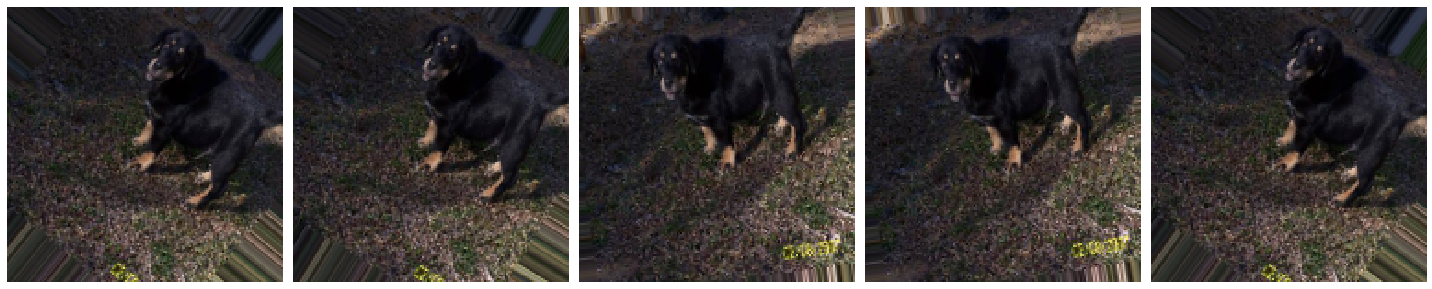

In [21]:
augmented_images_rotated = [train_data_gen[0][0][0] for i in range(5)]

plot_images(augmented_images_rotated)

#### Zoom augmentation
Apply a zoom augmentation to the dataset to zoom images according to a user-defined value randomly, from 0 to 1, in which 1 is 100%.

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_folder,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


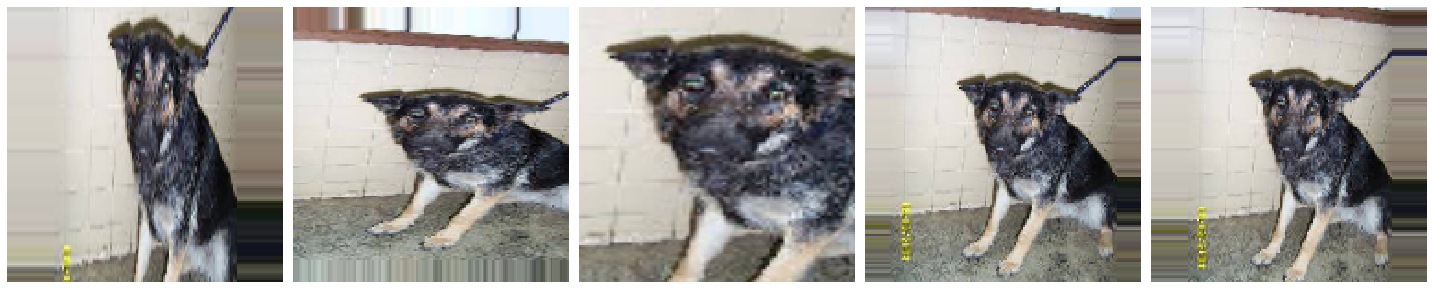

In [23]:
augmented_images_zoom = [train_data_gen[0][0][0] for i in range(5)]

plot_images(augmented_images_zoom)

#### Putting it all together
Applying all the previous augmentations at once: in addition to the ones before, it is also possible to shift the height and width.

In [24]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     width_shift_range=.15,
                                     height_shift_range=.15,
                                     horizontal_flip=True,
                                     zoom_range=0.5)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_folder,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


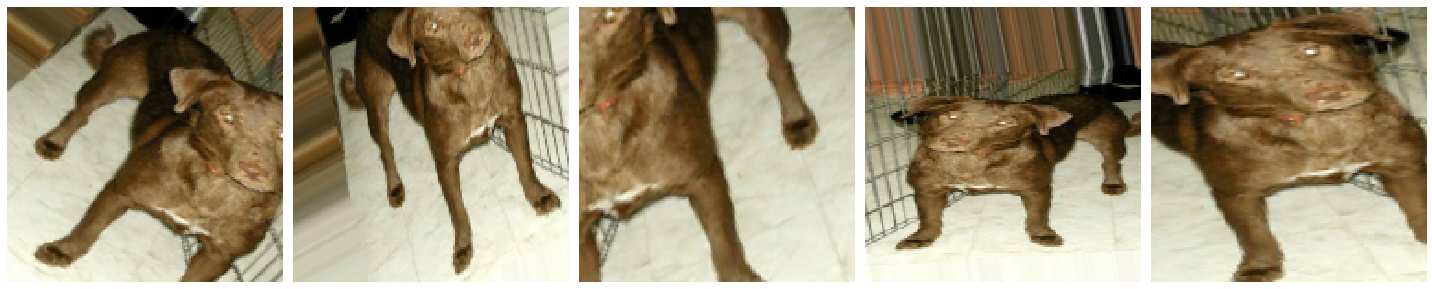

In [25]:
augmented_images_all = [train_data_gen[0][0][0] for i in range(5)]

plot_images(augmented_images_all)

#### Create validation data generator
It is advisable to only apply data augmentation to the training examples, while for the validation set, the images should only be rescaled and converted into batches, which can be done by using the ```ImageDataGenerator```.

In [26]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_folder,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Dropout
It is also possible to reduce overfitting by introducing dropout to the network. It is a form of regularization which fores the weights in the network to only take small values (distribution of weight values is more regular and the network can reduce overfitting on small training examples).

Applying dropout to a layer, randomly drops out (i.e. setting to 0) the number of output units from that layer during the training process. It takes a fractional number as input.

### Creating a new network with Dropouts

In [27]:
# Applying 20% dropout to first and last max pool layers (20% random neuros will be 0 in each training epoch)

model_new = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Conv2D(32, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Conv2D(64, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Flatten(),
                        Dense(512, activation='relu'), Dense(1)])

#### Compile the model

In [28]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

#### Train the model
Training the model after data augmentation in the training set and dropout in the network

In [29]:
history = model_new.fit_generator(train_data_gen,
                                  steps_per_epoch=total_train // batch_size,
                                  epochs=epochs,
                                  validation_data=val_data_gen,
                                  validation_steps=total_val // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 63s 4s/step - loss: 1.5711 - accuracy: 0.4984 - val_loss: 0.6928 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 57s 4s/step - loss: 0.6929 - accuracy: 0.4984 - val_loss: 0.6930 - val_accuracy: 0.4967
Epoch 3/15
15/15 [==============================] - 60s 4s/step - loss: 0.6928 - accuracy: 0.5027 - val_loss: 0.6962 - val_accuracy: 0.4967
Epoch 4/15
15/15 [==============================] - 61s 4s/step - loss: 0.6923 - accuracy: 0.5043 - val_loss: 0.6878 - val_accuracy: 0.4967
Epoch 5/15
15/15 [==============================] - 54s 4s/step - loss: 0.6862 - accuracy: 0.5027 - val_loss: 0.6778 - val_accuracy: 0.4978
Epoch 6/15
15/15 [==============================] - 64s 4s/step - loss: 0.6798 - accuracy: 0.5021 - val_loss: 0.6663 - val_accuracy: 0.5011
Epoch 7/15
15/15 [==============================] - 56s 4s/step - los

#### Visualize the Model

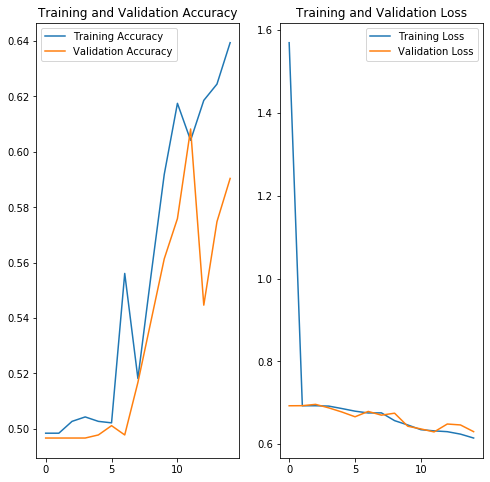

In [31]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Interpretation of the results

## Question 2 Bag of Tricks (60 points)

Practice training a deep neural network on the CIFAR10 image dataset:


### Question 2.1 (20 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 


In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170500096/170498071 [==============================] - 133s 1us/step


### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.